In [65]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.classes.ClassFractionalLorenz96 import FractionalLorenz96

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/"
extra_path = ("DLnz_NewLongerDriftEvalExp_MSEs_10240NPaths").replace(
            ".", "")
score_eval=pd.read_parquet(root_dir + extra_path+ "_score_MSE.parquet", engine="fastparquet")
nad_eval=pd.read_parquet(root_dir + extra_path+ "_nad_MSE.parquet")
nad_eval_true_law=pd.read_parquet(root_dir + extra_path+"_nad_true_law_MSE.parquet")
score_eval_true_law=pd.read_parquet(root_dir + extra_path+"_score_true_law_MSE.parquet")
score_state_eval=pd.read_parquet(root_dir + extra_path+ "_score_state_MSE.parquet")
nad_state_eval=pd.read_parquet(root_dir + extra_path+ "_nad_state_MSE.parquet")
stable_state_eval = (pd.concat([score_state_eval.rename({d:d+"Stable Score State" for d in score_state_eval.columns}, axis=1),nad_state_eval.rename({d:d+"Stable Nadaraya State" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:,:]
stable_true_law_eval = (pd.concat([score_eval_true_law.rename({d:d+"Stable Score True" for d in score_state_eval.columns}, axis=1),nad_eval_true_law.rename({d:d+"Stable Nadaraya True" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:,:]
stable_alt_law_eval = (pd.concat([score_eval.rename({d:d+"Stable Score" for d in score_state_eval.columns}, axis=1),nad_eval.rename({d:d+"Stable Nadaraya" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:,:]

In [67]:
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/"
extra_path = ("DLnzChaos_NewLongerDriftEvalExp_MSEs_10240NPaths").replace(
            ".", "")
score_eval=pd.read_parquet(root_dir + extra_path+ "_score_MSE.parquet", engine="fastparquet")
nad_eval=pd.read_parquet(root_dir + extra_path+ "_nad_MSE.parquet")
nad_eval_true_law=pd.read_parquet(root_dir + extra_path+"_nad_true_law_MSE.parquet")
score_eval_true_law=pd.read_parquet(root_dir + extra_path+"_score_true_law_MSE.parquet")
score_state_eval=pd.read_parquet(root_dir + extra_path+ "_score_state_MSE.parquet")
nad_state_eval=pd.read_parquet(root_dir + extra_path+ "_nad_state_MSE.parquet")
chaos_state_eval = (pd.concat([score_state_eval.rename({d:d+"Chaos Score State" for d in score_state_eval.columns}, axis=1),nad_state_eval.rename({d:d+"Chaos Nadaraya State" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:,:]
chaos_true_law_eval = (pd.concat([score_eval_true_law.rename({d:d+"Chaos Score True" for d in score_state_eval.columns}, axis=1),nad_eval_true_law.rename({d:d+"Chaos Nadaraya True" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:,:]
chaos_alt_law_eval = (pd.concat([score_eval.rename({d:d+"Chaos Score" for d in score_state_eval.columns}, axis=1),nad_eval.rename({d:d+"Chaos Nadaraya" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:,:]

In [68]:
time_ax = np.linspace(0, 1/256*(chaos_alt_law_eval.shape[0]-1),chaos_alt_law_eval.shape[0])

In [69]:
true_law_eval = (pd.concat([chaos_true_law_eval, stable_true_law_eval], axis=1)).sort_index(axis=1).set_index(time_ax)

In [70]:
alt_law_eval =(pd.concat([chaos_alt_law_eval, stable_alt_law_eval], axis=1)).sort_index(axis=1).set_index(time_ax)

In [71]:
state_eval = (pd.concat([chaos_state_eval, stable_state_eval], axis=1)).sort_index(axis=1).set_index(time_ax)

In [72]:
print(true_law_eval)

          12DLnzChaos Nadaraya True  12DLnzChaos Score True  \
0.000000                 574.405579               48.231583   
0.003906                 572.162720               49.688686   
0.007812                 570.094686               51.531433   
0.011719                 568.044678               53.208767   
0.015625                 565.975342               54.973285   
...                             ...                     ...   
4.984375                 190.375808               80.639720   
4.988281                 190.356086               80.639402   
4.992188                 190.336383               80.639043   
4.996094                 190.316687               80.638776   
5.000000                 190.296912               80.638570   

          12DLnzStable Nadaraya True  12DLnzStable Score True  \
0.000000                  572.084534                 8.473120   
0.003906                  572.520142                12.216372   
0.007812                  573.346273            

[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]


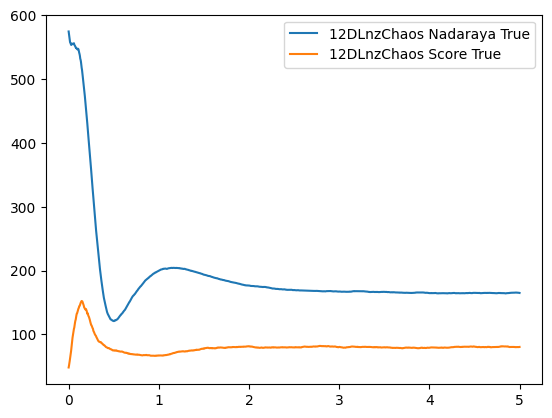

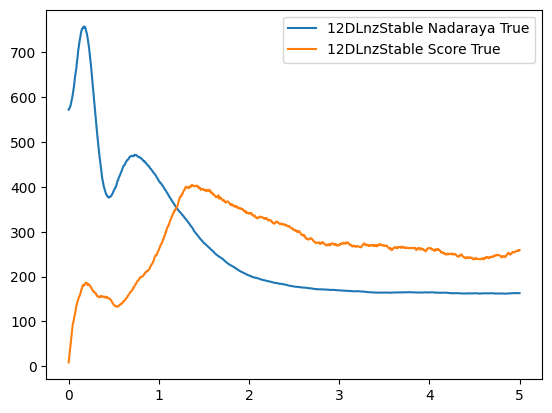

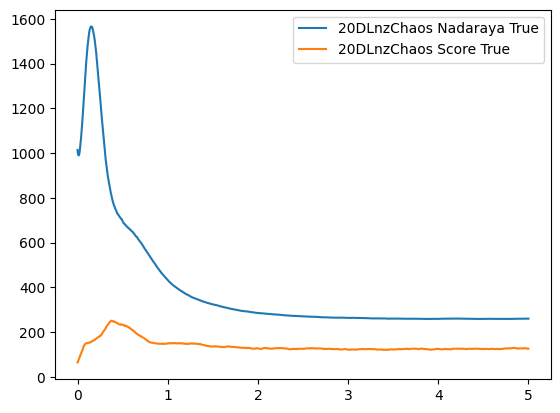

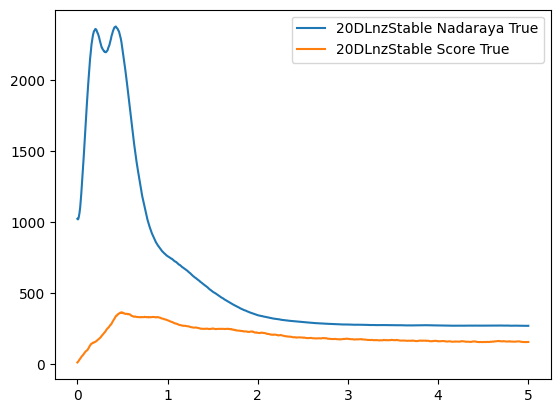

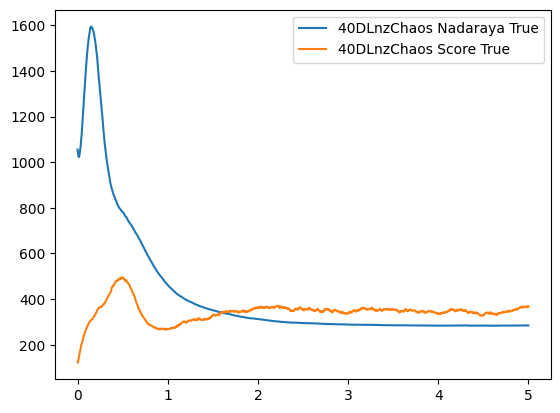

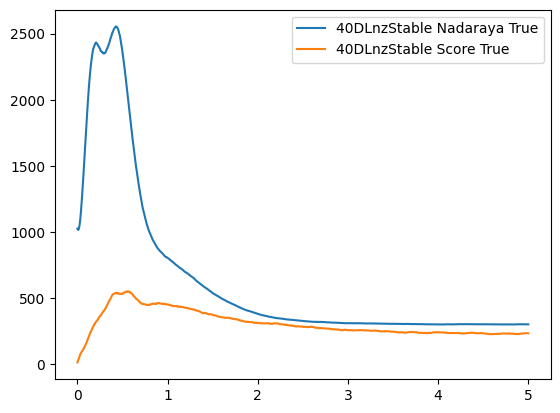

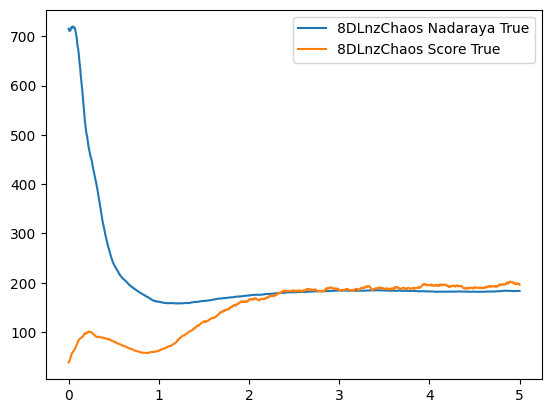

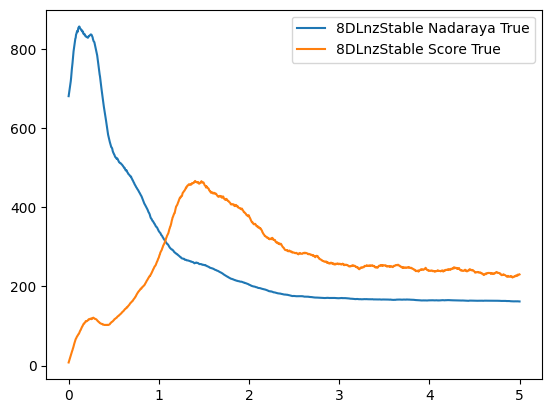

In [73]:
rawmeans = (true_law_eval*np.arange(1, 1281+1, 1)[:, np.newaxis]).diff(axis=0).dropna()
rawmeans = pd.concat([true_law_eval.iloc[[0], :], rawmeans], axis=0)
print([rawmeans.iloc[:,k:k+2].plot() for k in range(0, 16, 2)])

10.510097726828791
10.892749230881922
11.178497961226682
11.182999743627308
11.45699805889247
11.980120434124427
12.640318268385583
13.049446357066119
13.337522280007812
13.93282577644301
14.303574262623304
14.559908804570759
14.920242150112314
15.232772670670963
15.517872839144447
15.847342269752907
16.16769368346518
16.480682012403555
16.80065191913273
17.12161374401797
17.446733995019045
17.804206038187324
18.11486717452876
18.48428038626819
18.825652834749487
18.957272743920306
19.217231602207246
18.501791556792654
19.272130457075885
19.16656747485106
19.473604294853015
20.412645583064755
21.357142421134874
21.03763032278543
21.40055791581209
21.556975778884656
21.51626898378748
21.075323212716086
20.980518727414786
21.114351377087605
20.811472983201483
20.573832283426118
20.90734568805547
20.82482572761012
20.769888722043166
20.6774114293388
20.471855466842463
20.498064996581697
20.48120238792851
20.2195267482176
20.294721774587362
20.273128479343686
20.012177702900676
19.59469461

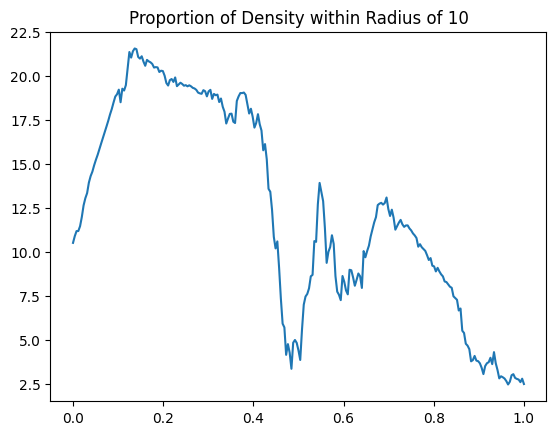

In [74]:
# Why is initial state error so high?
# Look at initial states
# Look at dataset
from configs.RecursiveVPSDE.Markovian_8DLorenz.recursive_Markovian_PostMeanScore_8DLorenz_Stable_T256_H05_tl_110data_StbleTgt_FULLDATA import get_config as get_8dlnz_config
config = get_8dlnz_config()
stable8d = np.load("/Users/marcos/GitHubRepos/FractionalBrownianMotion/data/8DLnz_samples_t00_dT3906e-03_T256_075FConst_10Diff.npy", allow_pickle=True)[:10240, :, :]
sample_path = stable8d[0, :, :]
stable8d = stable8d[1:, :, :]
num_paths = 1
initial_state = np.repeat(np.atleast_2d(config.initState)[np.newaxis, :], num_paths, axis=0)
assert (initial_state.shape == (num_paths, 1, config.ndims))
props = []
initial_state += 0.0000 * np.random.randn(*initial_state.shape)
dist = np.sum(np.power(stable8d - initial_state, 2), axis=-1).flatten()
prop = 100*(np.sum(dist <= 10)/dist.shape[0])
print(prop)
props.append(prop)
for t in range(1, 257):
    dist = np.sum(np.power(stable8d - sample_path[np.newaxis, [t-1], :], 2), axis=-1).flatten()
    prop = 100*(np.sum(dist <= 10)/dist.shape[0])
    print(prop)
    props.append(prop)
plt.plot(np.linspace(0, 1, 257), props)
plt.title("Proportion of Density within Radius of 10")
plt.show()
plt.close()

(8,) (10239, 256)
777.4836836099236
776.5162471265937
(8,) (10239, 256)
239.0645779972375
237.829172063536


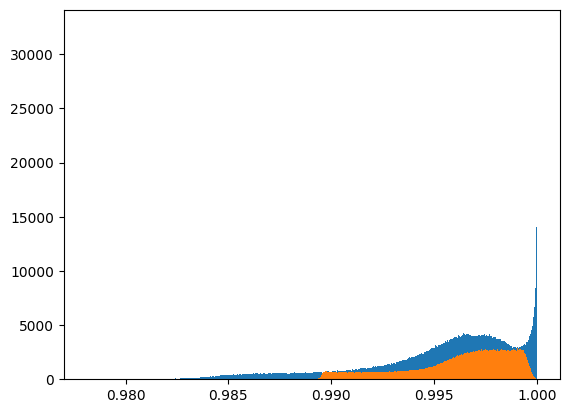

In [115]:
# Why is initial state error so high?
# Look at initial states
# Look at dataset
def drift_X(ndims, fc, prev):
    assert (len(prev.shape) == 1 and prev.shape[0] == ndims)
    driftX = np.zeros_like(prev)
    for i in range(ndims):
        driftX[i] = (prev[(i + 1) % ndims] - prev[i - 2]) * prev[i - 1] - prev[i]*fc
    return driftX
from configs.RecursiveVPSDE.Markovian_8DLorenz.recursive_Markovian_PostMeanScore_8DLorenz_Stable_T256_H05_tl_110data_StbleTgt_FULLDATA import get_config as get_8dlnz_config
config = get_8dlnz_config()
stable8d = np.load("/Users/marcos/GitHubRepos/FractionalBrownianMotion/data/8DLnz_samples_t00_dT3906e-03_T256_075FConst_10Diff.npy", allow_pickle=True)[:10240, :, :]
sample_path = stable8d[0, :, :]
stable8d = stable8d[1:, :, :]
num_paths = 1
initial_state = np.repeat(np.atleast_2d(config.initState)[np.newaxis, :], num_paths, axis=0)
assert (initial_state.shape == (num_paths, 1, config.ndims))
props = []
def compute(config, stable8d, initial_state):
    initial_state_drift = drift_X(ndims=config.ndims,fc=config.forcing_const, prev=initial_state.flatten())
    diffs = stable8d - initial_state
    dist = np.sum(np.power(diffs, 2), axis=-1)
    distexp = np.exp(-0.5*dist/10**4)
    distnnumerator = np.diff(stable8d, axis=1)*distexp[:, :-1, np.newaxis]
    print(np.sum(distnnumerator, axis=(0,1)).shape, distexp.shape)
    numerator = np.sum(distnnumerator, axis=(0,1))/(distexp.shape[0]*distexp.shape[1])
    denominator = (np.sum(distexp)/(distexp.shape[0]))
    l = numerator/denominator
    plt.hist(distexp.flatten(), bins=1900)
    print(np.sum(np.power(l-initial_state_drift, 2), axis=-1))
    print(np.sum(np.power(np.sum(np.diff(stable8d, axis=1), axis=(0,1))/(stable8d.shape[0]*stable8d.shape[1]) - initial_state_drift, 2), axis=-1))
initial_state += 0.0000 * np.random.randn(*initial_state.shape)
compute(config, stable8d, initial_state)
initial_state = sample_path[-1, :]
compute(config, stable8d, initial_state)
plt.show()
plt.close()

In [110]:
print()

(8,)

(8,) (10239, 256)


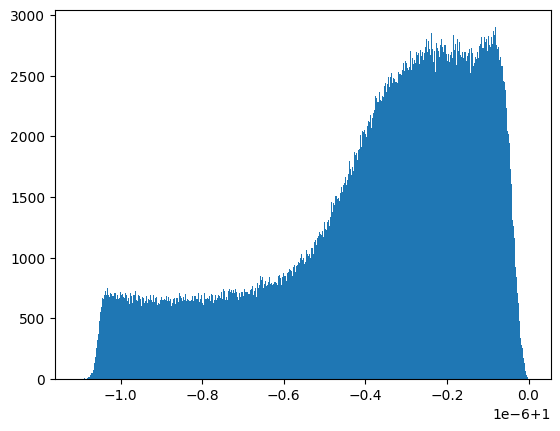

36.226722442126444
161.62604236382086


NameError: name 'R' is not defined

In [106]:
mses = rawmeans.iloc[:, -2:]
num_paths = mses.shape[0]
initial_state = np.repeat(np.atleast_2d(config.initState)[np.newaxis, :], num_paths, axis=0)

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.4229e+04, 1.7737e+04,
        3.2712e+04]),
 array([0.99999778, 0.99999779, 0.99999779, ..., 1.        , 1.        ,
        1.        ]),
 <BarContainer object of 1900 artists>)

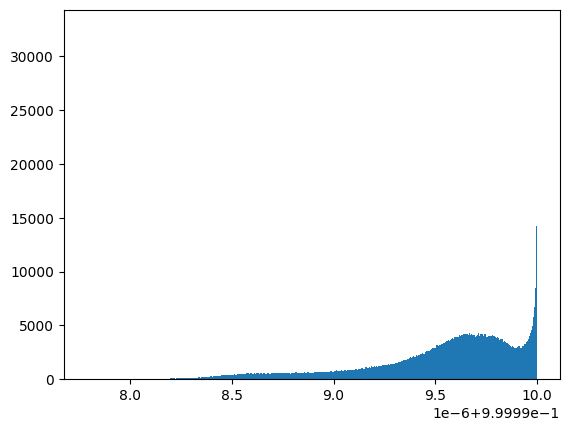

In [99]:
plt.hist(distexp.flatten(), bins=1900)

In [75]:
deltaT = 1/256
rvs = None
t0 = config.t0
t1 = config.t1
H = 0.5
num_paths = 10
diff = config.diffusion
forcing_const = config.forcing_const
ndims = config.ndims
# If I start at X0, how is it possible that my next state is so much different to X0?
fLnz = FractionalLorenz96(X0=np.array(config.initState), diff=diff, forcing_const=forcing_const,
                              num_dims=ndims)
is_path_observations = np.array(
    [fLnz.euler_simulation(H=H, N=config.ts_length, deltaT=deltaT, X0=np.array(config.initState), Ms=None, gaussRvs=rvs,
                           t0=t0, t1=t1)[0] for _ in (range(num_paths))]).reshape(
    (num_paths, config.ts_length + 1, config.ndims))
print(is_path_observations[:, 0, 3].flatten())
print(is_path_observations[:, 1, 3].flatten())

[0.643 0.643 0.643 0.643 0.643 0.643 0.643 0.643 0.643 0.643]
[0.71820475 0.71328499 0.57610851 0.72885848 0.71277669 0.76803902
 0.59502141 0.56531047 0.63446251 0.55908876]
